K-Means Clustering is a form of unsupervised machine learning (ML). Unsupervised algorithms use vectors on data points. These data points are not labeled or classified. Our goal is to discover hidden patterns and group the data points in a sensible way based on similarity of features. Each group of data points is a cluster and each cluster will have a center.

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

1. Specify number of clusters K.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
  
  a. Compute the sum of the squared distance between data points and all centroids.
  
  b. Assign each data point to the closest cluster (centroid).
  
  c. Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import math
from scipy.stats import mstats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
import datetime
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.cluster import DBSCAN

In [ ]:
stocksEI = ['AAPL', 'ADBE', 'ADI', 'AGNC', 'AMZN', 'BA', 'BAC', 'CMCSA', 'COLB', 'CSCO', 'CVS', 'CVX', 'ELAN', 'FANG', 'FIBK', 'GOOG', 'HON', 'IFF', 'JNJ', 'LH', 'LVS', 'MDT', 'MOS', 'MSFT', 'NSC', 'PFE', 'PM', 'SBUX', 'SCHW', 'SO', 'SRE', 'TRMB', 'TRNO', 'WMT']
stocksMCE = ['AAPL', 'AGNC', 'ALGN', 'AMZN', 'ANET', 'APTV', 'BDX', 'BMY', 'C', 'CI', 'CPT', 'CRM', 'CTVA', 'CUBE', 'CVX', 'EA', 'EL', 'EOG', 'ETN', 'EXC', 'FDX', 'FTNT', 'FUL', 'GIL', 'GOOG', 'GS', 'HON', 'INTU', 'LH', 'MDT', 'MSFT', 'NFLX', 'OTIS', 'PEP', 'PGR', 'PYPL', 'RTX', 'SBUX', 'SFM', 'SLAB', 'SPLK', 'SRE', 'STZ', 'TMUS', 'V', 'VRTX', 'WMT']

In [ ]:
#http://raw.rutgers.edu/docs/wcars/40wcars/Presentations/KexingXuanYunsen.pdf
warnings.simplefilter(action='ignore', category=FutureWarning)

data = pd.DataFrame()

for stock in stocksMCE:
  tick = yf.Ticker(stock)

  #General Info & Ratios
  info = tick.info

  #Balance Sheet Data
  balance = tick.balance_sheet
  recentBal = balance.columns[0]
  balance = balance[recentBal] / 1_000_000

  #Income Statement Data
  income = tick.income_stmt
  recentInc = income.columns[0]
  income = income[recentInc] / 1_000_000

  #Cash Flow Statement
  cashflow = tick.cashflow
  recentCash = cashflow.columns[0]
  cashflow = cashflow[recentCash] / 1_000_000


  #Net Profit Margin
  try:
    npm = info.get('profitMargins')
  except:
    npm = 'NA'

  #Gross Income (Gross Profit)
  if 'Gross Profit' in income.index:
    gross = income['Gross Profit']
  else:
    gross = 'NA'

  #Total Assets
  if 'Total Assets' in balance.index:
    totalAssets = balance['Total Assets']
  else:
    totalAssets = 'NA'

  #Total Debt
  if 'Total Debt' in balance.index:
    totalDebt = balance['Total Debt']
  else:
    totalDebt = 'NA'

  #Gross Profits / Total Assets
  try:
    GPROF = gross / totalAssets
  except:
    GPROF = 'NA'

  #Total Capitalization
  if 'Total Capitalization' in balance.index:
    totalCap = balance['Total Capitalization']
  else:
    totalCap = 'NA'

  #Capitalization Ratio
  try:
    capRatio = totalCap / totalAssets
  except:
    capRatio = 'NA'

  #Debt to Capital Ratio
  try:
    dtcRatio = totalDebt / (totalDebt + totalCap)
  except:
    dtcRatio = 'NA'

  #Total Revenue (Sales)
  if 'Total Revenue' in income.index:
    sales = income['Total Revenue']
  else:
    sales = 'NA'

  #Sales / Equity
  try:
    salesEqRatio = sales / totalCap
  except:
    salesEqRatio = 'NA'

  #Invested Capital
  if 'Invested Capital' in balance.index:
    invCap = balance['Invested Capital']
  else:
    incCap = 'NA'

  #Sales / Invested Capital
  try:
    salesInv = sales / invCap
  except:
    salesInv = 'NA'

  #Operating Cash Flow
  if 'Operating Cash Flow' in cashflow.index:
    opCash = cashflow['Operating Cash Flow']
  else:
    opCash = 'NA'

  #Cash Flow Margin = Operating Cash Flow / Total Revenue
  try:
    cfm = opCash / sales
  except:
    cfm = 'NA'

  #Long Term Debt
  if 'Long Term Debt' in balance.index:
    ltDebt = balance['Long Term Debt']
  else:
    ltDebt = 'NA'

  #Long Term Debt / Book Equity (Total Capitalization?)
  try:
    ltdEqRatio = ltDebt / totalCap
  except:
    ltdEqRatio = 'NA'

  getData = [npm, GPROF, capRatio, dtcRatio, salesEqRatio, salesInv, cfm, ltdEqRatio]
  df = pd.DataFrame([getData], columns=['Net Profit Margin', 'Gross Profit / Total Assets', 'Capitalization Ratio', 'Debt to Capital', 'Sales to Equity Ratio', 'Sales / Invested Capital', 'Cash Flow Margin', 'Long Debt / Equity'], index = [stock])

  #getData = [npm, GPROF]
  #df = pd.DataFrame([getData], columns=['Net Profit Margin','Gross Profit / Total Assets'], index = [stock])
  data = data.append(df)

data

,Net Profit Margin,Gross Profit / Total Assets,Capitalization Ratio,Debt to Capital,Sales to Equity Ratio,Sales / Invested Capital,Cash Flow Margin,Long Debt / Equity
AAPL,0.24493,0.484138,0.424178,0.445195,2.635336,2.309510,0.309770,0.661354
AGNC,0.00000,NA,0.153919,0.011787,-0.140113,-0.176275,-0.907706,0.011927
ALGN,0.08505,0.442804,0.605479,0.027105,1.037007,1.037007,0.152286,NA
AMZN,0.00818,0.146193,0.460783,0.396585,2.410881,2.410881,0.090960,0.314973
ANET,0.31235,0.394913,0.721111,0.008918,0.896740,0.896740,0.112481,NA
APTV,0.03679,0.120314,0.697959,0.309513,1.144119,1.141803,0.072217,0.422609
BDX,0.08597,0.160143,0.740299,0.290759,0.481537,1.174603,0.139534,0.354352
BMY,0.15946,0.372051,0.682886,0.381124,0.698141,0.655845,0.283065,0.530212
C,0.21224,NA,0.195639,0.402657,0.159276,0.150341,0.332900,0.574469
CI,0.03686,NA,0.506989,0.298784,2.475497,2.377964,0.047918,0.385079


In [ ]:
#MCE changes
data.loc['AGNC', 'Gross Profit / Total Assets'] = 3304.0 / 66111.0
data.loc['C', 'Gross Profit / Total Assets'] = 39507.0 / 2455113.0
data.loc['CI', 'Gross Profit / Total Assets'] = 8028.0 / 147946
data.loc['GS', 'Gross Profit / Total Assets'] = 7632.0 / 1538349.0
data.loc['PGR', 'Gross Profit / Total Assets'] = 1563.6 / 80407.0
data.loc['ALGN', 'Long Debt / Equity'] = 400.0 / 3480.0
data.loc['ANET', 'Long Debt / Equity'] = 0
data.loc['VRTX', 'Long Debt / Equity'] = 0
data

,Net Profit Margin,Gross Profit / Total Assets,Capitalization Ratio,Debt to Capital,Sales to Equity Ratio,Sales / Invested Capital,Cash Flow Margin,Long Debt / Equity
AAPL,0.24493,0.484138,0.424178,0.445195,2.635336,2.309510,0.309770,0.661354
AGNC,0.00000,0.049977,0.153919,0.011787,-0.140113,-0.176275,-0.907706,0.011927
ALGN,0.08505,0.442804,0.605479,0.027105,1.037007,1.037007,0.152286,0.114943
AMZN,0.00818,0.146193,0.460783,0.396585,2.410881,2.410881,0.090960,0.314973
ANET,0.31235,0.394913,0.721111,0.008918,0.896740,0.896740,0.112481,0
APTV,0.03679,0.120314,0.697959,0.309513,1.144119,1.141803,0.072217,0.422609
BDX,0.08597,0.160143,0.740299,0.290759,0.481537,1.174603,0.139534,0.354352
BMY,0.15946,0.372051,0.682886,0.381124,0.698141,0.655845,0.283065,0.530212
C,0.21224,0.016092,0.195639,0.402657,0.159276,0.150341,0.332900,0.574469
CI,0.03686,0.054263,0.506989,0.298784,2.475497,2.377964,0.047918,0.385079


In [ ]:
#EI changes
data.loc['AGNC', 'Gross Profit / Total Assets'] = 3304.0 / 66111.0
data.loc['BAC', 'Gross Profit / Total Assets'] = 9495.0 / 3194657.0
data.loc['COLB', 'Gross Profit / Total Assets'] = 840.0 / 53643.0
data.loc['FIBK', 'Gross Profit / Total Assets'] = 255.0 / 31464.0
data.loc['SCHW', 'Gross Profit / Total Assets'] = 20762.0 / 535552.0
data

,Net Profit Margin,Gross Profit / Total Assets,Capitalization Ratio,Debt to Capital,Sales to Equity Ratio,Sales / Invested Capital,Cash Flow Margin,Long Debt / Equity
AAPL,0.24493,0.484138,0.424178,0.445195,2.635336,2.309510,0.309770,0.661354
ADBE,0.26339,0.568415,0.650837,0.207637,0.995814,0.968427,0.445189,0.205260
ADI,0.28161,0.149744,0.855108,0.132128,0.279304,1.834576,0.372517,0.152244
AGNC,0.00000,0.049977,0.153919,0.011787,-0.140113,-0.176275,-0.907706,0.011927
AMZN,0.00818,0.146193,0.460783,0.396585,2.410881,2.410881,0.090960,0.314973
BA,-0.05855,0.025543,0.262057,0.613382,1.853930,1.619923,0.052726,1.442079
BAC,0.30276,0.002972,0.180017,0.355494,0.172894,0.173357,-0.066635,0.502536
CMCSA,0.04708,0.323444,0.676362,0.352691,0.697812,0.690892,0.217522,0.534840
COLB,0.19208,0.015659,0.119234,0.270671,0.334315,0.334315,0.838907,0.346977
CSCO,0.20894,0.343057,0.512638,0.164893,1.069891,5.418497,0.256532,0.174646


In [ ]:
original_data=data.copy()

In [ ]:
data = original_data.copy()

In [ ]:
#Standardized data to z-scores
data[data.columns] = preprocessing.StandardScaler().fit_transform(data)
data

,Net Profit Margin,Gross Profit / Total Assets,Capitalization Ratio,Debt to Capital,Sales to Equity Ratio,Sales / Invested Capital,Cash Flow Margin,Long Debt / Equity
AAPL,0.919373,1.137926,-0.769567,0.715713,0.500377,0.393139,0.609967,0.162198
AGNC,-1.116568,-1.277931,-2.051614,-1.696426,-0.820269,-0.946975,-5.054609,-0.655466
ALGN,-0.409604,0.907928,0.090482,-1.611172,-0.260158,-0.292881,-0.122763,-0.525764
AMZN,-1.048573,-0.742540,-0.595921,0.445178,0.393574,0.447790,-0.408094,-0.273914
ANET,1.479791,0.641441,0.639010,-1.712391,-0.326902,-0.368501,-0.307965,-0.670483
APTV,-0.810757,-0.886543,0.529184,-0.039425,-0.209191,-0.236384,-0.495301,-0.138395
BDX,-0.401956,-0.664919,0.730036,-0.143802,-0.524469,-0.218702,-0.182095,-0.224334
BMY,0.208917,0.514229,0.457680,0.359127,-0.421402,-0.498370,0.485717,-0.002917
C,0.647643,-1.466480,-1.853706,0.478971,-0.677811,-0.770893,0.717583,0.052806
CI,-0.810175,-1.254079,-0.376731,-0.099135,0.424320,0.430043,-0.608357,-0.185647


In [ ]:
standardized_data=data.copy()

Text(0.5, 1.0, 'Original Data')

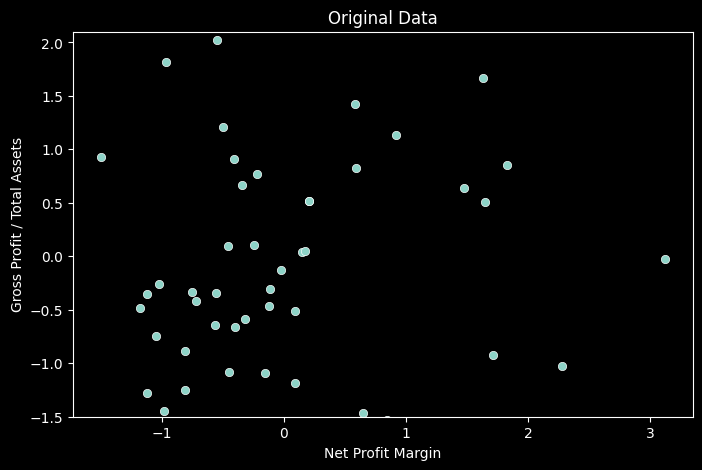

In [ ]:
# Visualize scatterplot
plt.figure(figsize=(8,5))
plt.grid(False)
plt.style.use("dark_background")
g = sns.scatterplot(x='Net Profit Margin', y='Gross Profit / Total Assets', data=data)
plt.ylim([-1.5,2.1])
plt.title("Original Data")

In [ ]:
X =np.asarray([np.asarray(data['Net Profit Margin']),
               np.asarray(data['Gross Profit / Total Assets'])])
X = mstats.winsorize(X, limits = [0.05, 0.05])
data=pd.DataFrame(X, index=['Net Profit Margin','Gross Profit / Total Assets'], columns=data.index).T
data.head()

,Net Profit Margin,Gross Profit / Total Assets
AAPL,0.919373,1.137926
AGNC,-1.116568,-1.277931
ALGN,-0.409604,0.907928
AMZN,-1.048573,-0.742540
ANET,1.479791,0.641441


Text(0.5, 1.0, 'Winsorized Data')

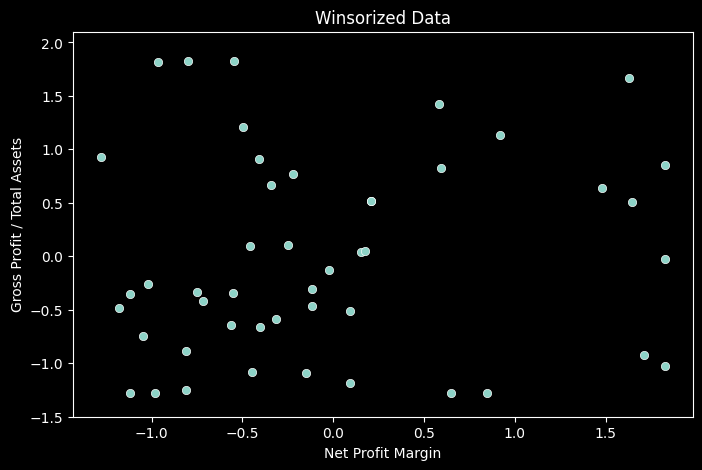

In [ ]:
# Visualize scatterplot
plt.figure(figsize=(8,5))
plt.grid(False)
plt.style.use("dark_background")
g = sns.scatterplot(x='Net Profit Margin', y='Gross Profit / Total Assets', data=data)
plt.ylim([-1.5,2.1])
plt.title("Winsorized Data")

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

distorsions = []
clusters_iterations=range(2, 20)
for k in clusters_iterations:
    k_means = KMeans(n_clusters=k)
    k_means.fit(data)
    distorsions.append(k_means.inertia_)

In [ ]:
elbow_curve_data=pd.DataFrame(zip(clusters_iterations,distorsions),columns=['Cluster','SSE']).set_index('Cluster')
elbow_curve_data.head()

,SSE
Cluster,
2,45.138547
3,26.936202
4,19.362005
5,13.754412
6,11.341652


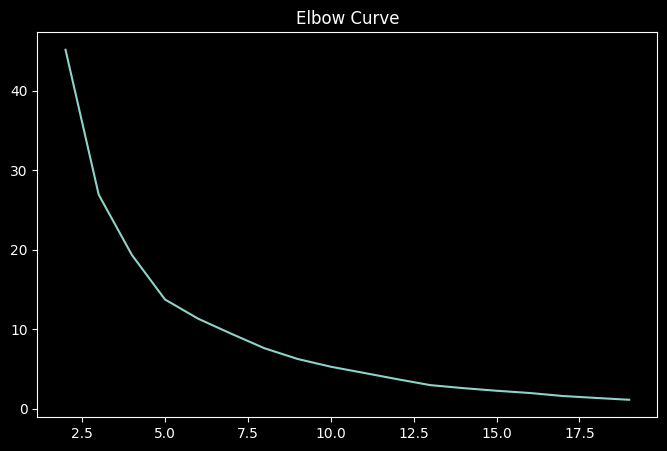

In [ ]:
# Visualize plot
plt.figure(figsize=(8,5))
plt.grid(False)
plt.style.use("dark_background")
plt.plot(elbow_curve_data['SSE'])
plt.title("Elbow Curve")

plt.show()

In [ ]:
# get elbow programmatically
from kneed import KneeLocator
kl = KneeLocator(
clusters_iterations, distorsions, curve="convex", direction="decreasing")
elbow=kl.elbow

print('Elbow = {}'.format(elbow))

ModuleNotFoundError: ignored

In [ ]:
# Guessed Elbow
elbow = 7

In [ ]:
# We apply KMeans for the Elbow's value
kmeans = KMeans(n_clusters=elbow)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)
df_kmeans = data.copy()
df_kmeans['cluster']=y_kmeans.astype(str)

<ipython-input-80-75fdea8d8176>:5: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  g = sns.scatterplot(x='Net Profit Margin', y='Gross Profit / Total Assets', hue=df_kmeans['cluster'].astype(int),


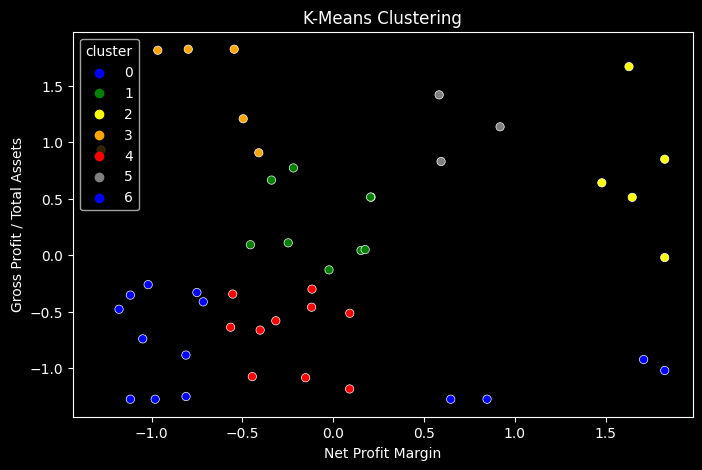

In [ ]:
# Visualize the results
plt.figure(figsize=(8,5))
plt.grid(False)
plt.style.use("dark_background")
g = sns.scatterplot(x='Net Profit Margin', y='Gross Profit / Total Assets', hue=df_kmeans['cluster'].astype(int),
                    palette=['blue','green','yellow','orange','red','grey'], data=df_kmeans)
plt.title("K-Means Clustering")

plt.show()

In [ ]:
# see the centers
clusters_centers_df=pd.DataFrame(kmeans.cluster_centers_,columns=['Net Profit Margin','Gross Profit / Total Assets'])
clusters_centers_df

,Net Profit Margin,Gross Profit / Total Assets
0,-0.360376,0.280374
1,1.983942,-0.376310
2,0.518286,1.826154
3,-1.168245,-0.796150
4,0.407976,-1.001294
5,0.590734,0.890815
6,-0.884084,1.983942


In [ ]:
# See the clustering by Company
clustering_result=pd.DataFrame(zip(y_kmeans,data.index),columns=['Cluster','Company'])
clustering_result.set_index('Cluster').head()

,Company
Cluster,
2,AAPL
2,ADBE
4,ADI
3,AGNC
3,AMZN


In [ ]:
for cluster_num in list(clustering_result.set_index('Cluster').index.unique()):
    print (clustering_result.set_index('Cluster').loc[cluster_num].head())

        Company
Cluster        
2          AAPL
2          ADBE
        Company
Cluster        
4           ADI
4           BAC
4          COLB
4          FIBK
4           NSC
        Company
Cluster        
3          AGNC
3          AMZN
3            BA
3          ELAN
3           IFF
        Company
Cluster        
0         CMCSA
0           CVS
0           CVX
0           HON
0           JNJ
        Company
Cluster        
5          CSCO
5          GOOG
5          MSFT
5           PFE
5            PM
        Company
Cluster        
1          FANG
1          TRNO
Company    WMT
Name: 6, dtype: object


In [ ]:
# Enrich Centers Df with the number of elements by Cluster
clusters_centers_df['Count']=clustering_result['Cluster'].value_counts().to_frame().rename(columns={'Cluster':'Count'})['Count']
clusters_centers_df.head()

,Net Profit Margin,Gross Profit / Total Assets,Count
0,-0.360376,0.280374,10
1,1.983942,-0.376310,2
2,0.518286,1.826154,2
3,-1.168245,-0.796150,6
4,0.407976,-1.001294,8


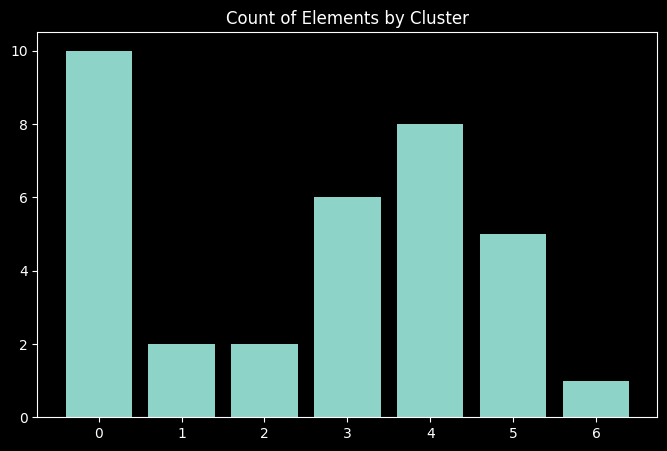

In [ ]:
# Visualize Count of Elements by Cluster
plt.figure(figsize=(8,5))
plt.grid(False)
plt.style.use("dark_background")
plt.bar(clusters_centers_df.index.values,clusters_centers_df['Count'])
plt.title("Count of Elements by Cluster")

plt.show()

In [ ]:
#PCA Dimension Reduction to 2D (KMeans)
#https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240
data = standardized_data.copy()

#Dimension reduction 8 -> 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# % Data not lost
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.46492545 0.21371691]
Cumulative variance explained by 2 principal components: 67.86%


In [ ]:
pca.components_

array([[-0.15138886,  0.16233668, -0.38208647,  0.41467703,  0.49281967,
         0.44065052, -0.06425868,  0.43773029],
       [-0.60536914, -0.27589338, -0.2061936 , -0.12826165, -0.09712081,
        -0.03312871, -0.6874592 , -0.12375004]])

In [ ]:
dataset_pca = pd.DataFrame(abs(pca.components_), columns=data.columns, index=['PC_1', 'PC_2'])
dataset_pca

,Net Profit Margin,Gross Profit / Total Assets,Capitalization Ratio,Debt to Capital,Sales to Equity Ratio,Sales / Invested Capital,Cash Flow Margin,Long Debt / Equity
PC_1,0.151389,0.162337,0.382086,0.414677,0.492820,0.440651,0.064259,0.43773
PC_2,0.605369,0.275893,0.206194,0.128262,0.097121,0.033129,0.687459,0.12375


“To interpret each principal components, examine the magnitude and direction of the coefficients for the original variables. The larger the absolute value of the coefficient, the more important the corresponding variable is in calculating the component.”

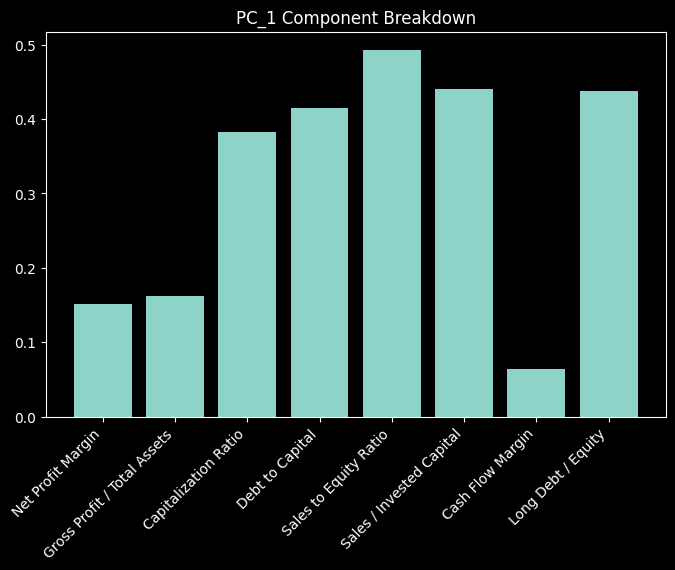

In [ ]:
# Visualize Count of Elements by Cluster
plt.figure(figsize=(8,5))
plt.grid(False)
plt.style.use("dark_background")

vals = dataset_pca.columns
plt.bar(list(dataset_pca.columns), list(dataset_pca.loc['PC_1', :].values))
plt.title("PC_1 Component Breakdown")
plt.xticks(rotation=45, ha='right')

plt.show()

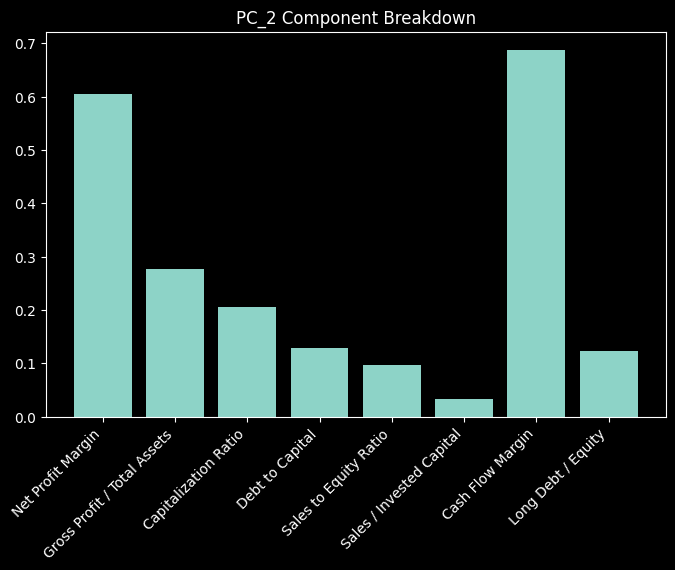

In [ ]:
# Visualize Count of Elements by Cluster
plt.figure(figsize=(8,5))
plt.grid(False)
plt.style.use("dark_background")

vals = dataset_pca.columns
plt.bar(list(dataset_pca.columns), list(dataset_pca.loc['PC_2', :].values))
plt.title("PC_2 Component Breakdown")
plt.xticks(rotation=45, ha='right')

plt.show()

To interpret each principal components, examine the magnitude and direction of the coefficients for the original variables. The larger the absolute value of the coefficient, the more important the corresponding variable is in calculating the component.”

Text(0.5, 1.0, 'Scatterplot of Ticker Data')

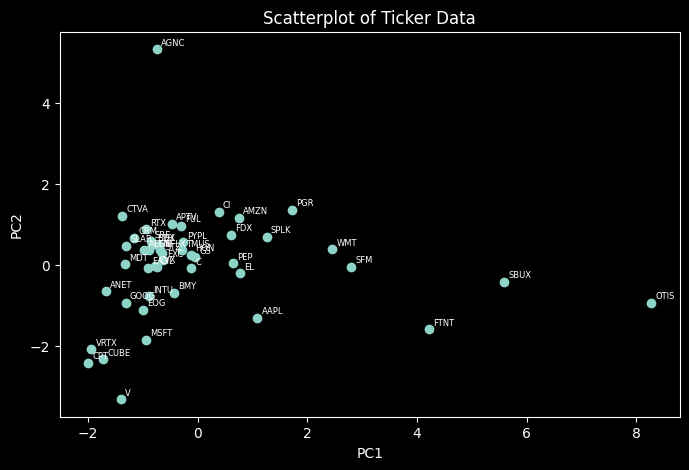

In [ ]:
plt.figure(figsize=(8,5))
plt.grid(False)

plt.scatter(pca_result[:, 0], pca_result[:, 1])

for i, ticker in enumerate(data.index):
    plt.annotate(ticker, (pca_result[i, 0], pca_result[i, 1]), fontsize=6, xytext = (3, 3), textcoords='offset points')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of Ticker Data')

In [ ]:
pca_result

array([[ 1.08801142, -1.30464596],
       [-0.74163894,  5.33611336],
       [-0.97281193,  0.36989224],
       [ 0.74810188,  1.16679733],
       [-1.67132614, -0.64627236],
       [-0.47573014,  1.01711478],
       [-0.82699351,  0.50582056],
       [-0.4338716 , -0.68488975],
       [-0.12594426, -0.0751571 ],
       [ 0.37834448,  1.31257935],
       [-2.00618982, -2.41146154],
       [-1.16332217,  0.67424274],
       [-1.37406922,  1.22069885],
       [-1.72583936, -2.32717048],
       [-0.78687729, -0.03347798],
       [-0.90608417, -0.06489684],
       [ 0.76837666, -0.19865937],
       [-0.99868575, -1.11008328],
       [-0.88557337,  0.36418927],
       [-0.64331771,  0.11465493],
       [ 0.60516751,  0.75097341],
       [ 4.22152091, -1.58768088],
       [-0.31302494,  0.97812881],
       [-0.75233611, -0.05064161],
       [-1.31711762, -0.93398848],
       [-0.04478167,  0.18743187],
       [-0.13094318,  0.24820071],
       [-0.89725531, -0.77278985],
       [-0.70660506,

In [ ]:
#Winsorize
X = mstats.winsorize(pca_result.T, limits = [0.05, 0.05])
pca_result=pd.DataFrame(X, index=['PC_1','PC_2'], columns=data.index).T
pca_result.head()

,PC_1,PC_2
AAPL,1.088011,-1.304646
AGNC,-0.741639,2.791182
ALGN,-0.972812,0.369892
AMZN,0.748102,1.166797
ANET,-1.671326,-0.646272


In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

distorsions = []
clusters_iterations=range(2, 20)
for k in clusters_iterations:
    k_means = KMeans(n_clusters=k)
    k_means.fit(pca_result)
    distorsions.append(k_means.inertia_)

In [ ]:
elbow_curve_data=pd.DataFrame(zip(clusters_iterations,distorsions),columns=['Cluster','SSE']).set_index('Cluster')
elbow_curve_data.head()

,SSE
Cluster,
2,69.004861
3,37.764365
4,26.204227
5,22.097881
6,16.790657


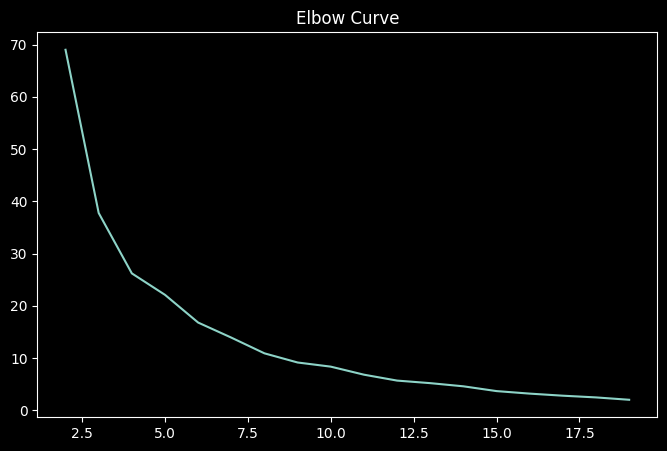

In [ ]:
# Visualize plot
plt.figure(figsize=(8,5))
plt.grid(False)
plt.style.use("dark_background")
plt.plot(elbow_curve_data['SSE'])
plt.title("Elbow Curve")

plt.show()

In [ ]:
elbow = 7

In [ ]:
# Apply KMeans for the Elbow's value
kmeans = KMeans(n_clusters=elbow)
kmeans.fit(pca_result)
y_kmeans = kmeans.predict(pca_result)
df_kmeans = pca_result.copy()
df_kmeans['cluster']=y_kmeans.astype(str)

<ipython-input-160-aa6e5924a73b>:6: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  g = sns.scatterplot(x='PC_1', y='PC_2', hue=df_kmeans['cluster'].astype(int),


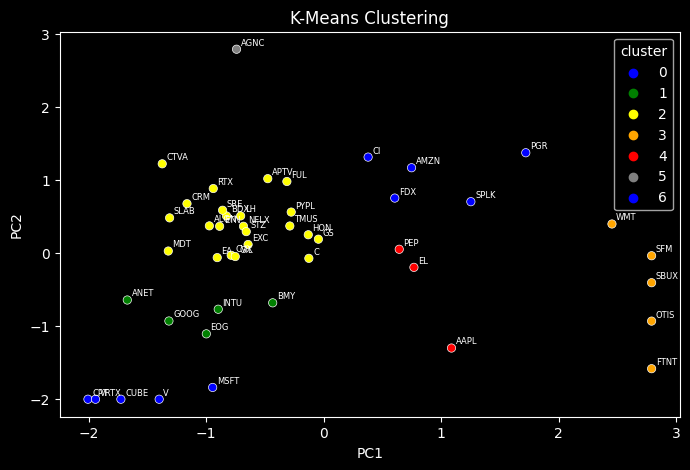

In [ ]:
# Visualize the results
plt.figure(figsize=(8,5))
plt.grid(False)
plt.style.use("dark_background")

g = sns.scatterplot(x='PC_1', y='PC_2', hue=df_kmeans['cluster'].astype(int),
                    palette=['blue','green','yellow','orange','red','grey'], data=df_kmeans)

for i, ticker in enumerate(pca_result.index):
    plt.annotate(ticker, (pca_result['PC_1'][i], pca_result['PC_2'][i]), fontsize=6, xytext = (3, 3), textcoords='offset points')

plt.title("K-Means Clustering")
plt.xlabel('PC1')
plt.ylabel('PC2')

# Some random point we want to classify
plt.show()

In [ ]:
# see the centers
clusters_centers_df=pd.DataFrame(kmeans.cluster_centers_,columns=['PC_1','PC_2'])
clusters_centers_df

,PC_1,PC_2
0,0.940987,1.060825
1,-1.063651,-0.829605
2,-0.715125,0.413724
3,2.723709,-0.515206
4,0.833220,-0.484703
5,-0.741639,2.791182
6,-1.603762,-1.973887


In [ ]:
# See the clustering by Company
clustering_result=pd.DataFrame(zip(y_kmeans,data.index),columns=['Cluster','Company'])
clustering_result.set_index('Cluster').head()

,Company
Cluster,
4,AAPL
5,AGNC
2,ALGN
0,AMZN
1,ANET


In [ ]:
for cluster_num in list(clustering_result.set_index('Cluster').index.unique()):
    print (clustering_result.set_index('Cluster').loc[cluster_num].head())

        Company
Cluster        
4          AAPL
4            EL
4           PEP
Company    AGNC
Name: 5, dtype: object
        Company
Cluster        
2          ALGN
2          APTV
2           BDX
2             C
2           CRM
        Company
Cluster        
0          AMZN
0            CI
0           FDX
0           PGR
0          SPLK
        Company
Cluster        
1          ANET
1           BMY
1           EOG
1          GOOG
1          INTU
        Company
Cluster        
6           CPT
6          CUBE
6          MSFT
6             V
6          VRTX
        Company
Cluster        
3          FTNT
3          OTIS
3          SBUX
3           SFM
3           WMT


In [ ]:
#PCA Dimension Reduction to 3D (KMeans)
data = standardized_data.copy()

#Dimension reduction 8 -> 3
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# % Data not lost
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.46492545 0.21371691 0.12790338]
Cumulative variance explained by 3 principal components: 80.65%


In [ ]:
dataset_pca = pd.DataFrame(abs(pca.components_), columns=data.columns, index=['PC_1', 'PC_2', 'PC_3'])
dataset_pca

,Net Profit Margin,Gross Profit / Total Assets,Capitalization Ratio,Debt to Capital,Sales to Equity Ratio,Sales / Invested Capital,Cash Flow Margin,Long Debt / Equity
PC_1,0.151389,0.162337,0.382086,0.414677,0.492820,0.440651,0.064259,0.43773
PC_2,0.605369,0.275893,0.206194,0.128262,0.097121,0.033129,0.687459,0.12375
PC_3,0.125501,0.821907,0.124208,0.321991,0.127609,0.212071,0.167781,0.31655


In [ ]:
#Winsorize
pca_result = mstats.winsorize(pca_result.T, limits = [0.05, 0.05]).T

Text(0.5, 0.92, 'Scatterplot of Ticker Data')

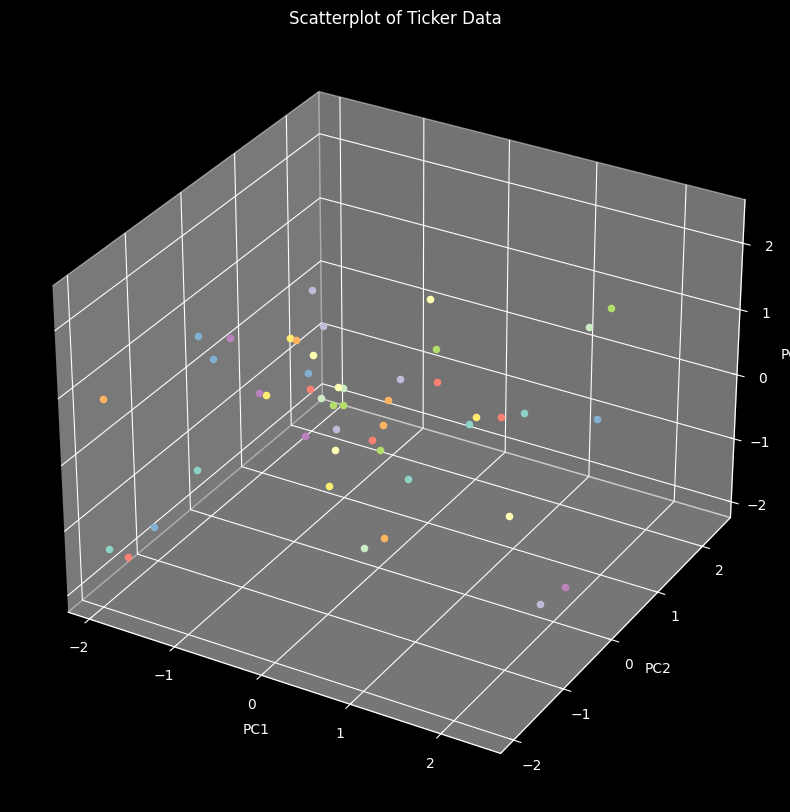

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

for i, ticker in enumerate(data.index):
  ax.scatter(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Scatterplot of Ticker Data')

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

distorsions = []
clusters_iterations=range(2, 20)
for k in clusters_iterations:
    k_means = KMeans(n_clusters=k)
    k_means.fit(pca_result)
    distorsions.append(k_means.inertia_)

In [ ]:
elbow_curve_data=pd.DataFrame(zip(clusters_iterations,distorsions),columns=['Cluster','SSE']).set_index('Cluster')
elbow_curve_data.head()

,SSE
Cluster,
2,105.513622
3,72.223102
4,57.447279
5,46.806365
6,38.729845


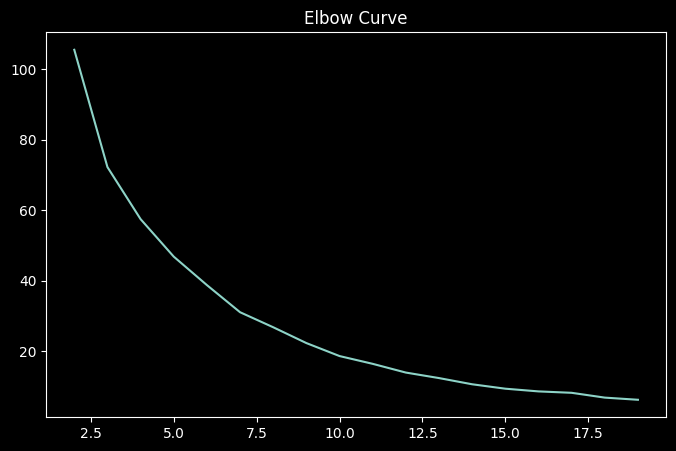

In [ ]:
# Visualize plot
plt.figure(figsize=(8,5))
plt.grid(False)
plt.style.use("dark_background")
plt.plot(elbow_curve_data['SSE'])
plt.title("Elbow Curve")

plt.show()

In [ ]:
elbow = 7

In [ ]:
# Apply KMeans for the Elbow's value
kmeans = KMeans(n_clusters=elbow)
kmeans.fit(pca_result)
y_kmeans = kmeans.predict(pca_result)
df_kmeans = data.copy()
df_kmeans['cluster']=y_kmeans.astype(str)

In [ ]:
# see the centers
clusters_centers_df=pd.DataFrame(kmeans.cluster_centers_,columns=['PC_1', 'PC_2', 'PC_3'])
clusters_centers_df

,PC_1,PC_2,PC_3
0,-0.444395,0.417645,-0.982579
1,2.023691,-1.059237,-0.317972
2,-1.295189,-1.208286,0.925624
3,0.891368,0.892220,-0.085127
4,-1.689258,-1.941905,-1.186107
5,-0.878630,0.465993,0.227112
6,1.813181,0.052538,2.070704


In [ ]:
# See the clustering by Company
clustering_result=pd.DataFrame(zip(y_kmeans,data.index),columns=['Cluster','Company'])
original_clustering_result = clustering_result.copy()
clustering_result.set_index('Cluster').head()

,Company
Cluster,
1,AAPL
5,AGNC
5,ALGN
3,AMZN
2,ANET


In [ ]:
for cluster_num in list(clustering_result.set_index('Cluster').index.unique()):
    print (clustering_result.set_index('Cluster').loc[cluster_num].head())

        Company
Cluster        
1          AAPL
1          FTNT
1          OTIS
1          SBUX
        Company
Cluster        
5          AGNC
5          ALGN
5           BDX
5           BMY
5           CRM
        Company
Cluster        
3          AMZN
3            CI
3           FDX
3           PEP
3           PGR
        Company
Cluster        
2          ANET
2           EOG
2          GOOG
2          INTU
2          MSFT
        Company
Cluster        
0          APTV
0             C
0           EXC
0            GS
0           HON
        Company
Cluster        
4           CPT
4          CUBE
4             V
        Company
Cluster        
6            EL
6           SFM
6           WMT


In [ ]:
clustering_result = clustering_result.set_index('Company')

In [ ]:
# https://miabellaai.net/
# Very nice 3D! Format:
for i, arr in enumerate(data.index):
        print(str(data.index[i]) + '::' #Label
              + str(pca_result[i][0]) + '::' #X
              + str(pca_result[i][1]) + '::' #Y
              + str(pca_result[i][2]) + '::' #Z
              + str((clustering_result.loc[str(data.index[i])][0]*10)^2) + '::' #Color by cluster
              + str(13) + '::' #Size
              + str(1) + '::' #Group
              + str(1) + '::' #Transparency
              + str(0) + '::' #Blink Rate
              + str(0) + '::' #Jitter
              + str(0) + '::' #Stripe
              + str(0) + ';' #Expand/Contract
        )

AAPL::1.0880114218645178::-1.304645955691622::0.487389048424701::8::13::1::1::0::0::0::0;
AGNC::-0.7416389402718694::2.3355836258029123::0.13125101712464304::48::13::1::1::0::0::0::0;
ALGN::-0.9728119329184769::0.36989224188189423::1.4193772897250134::48::13::1::1::0::0::0::0;
AMZN::0.7481018825545267::1.1667973253082062::-0.3956992515417098::28::13::1::1::0::0::0::0;
ANET::-1.6713261392610395::-0.6462723592630618::1.1162829969244057::22::13::1::1::0::0::0::0;
APTV::-0.4757301388620253::1.01711477947764::-0.49839622931343486::2::13::1::1::0::0::0::0;
BDX::-0.8269935078835943::0.505820564722234::-0.3708189328574276::48::13::1::1::0::0::0::0;
BMY::-0.43387159868201114::-0.6848897526966673::0.09760580220284651::48::13::1::1::0::0::0::0;
C::-0.12594426338221515::-0.07515709756412736::-1.9419045677635254::2::13::1::1::0::0::0::0;
CI::0.37834448381683716::1.3125793520580784::-0.6377473129613326::28::13::1::1::0::0::0::0;
CPT::-1.9419045677635254::-1.9419045677635254::-1.3652815557459217::42:

At this point, we can check to see whether these clusters internally correlated in the past

We should also check whether the clusters correlated with each other.

In [ ]:
# We will find the internal correlation of each clusters relative returns to SPY index
price_data = yf.download(['SPY'], start='2018-01-01', end="2023-07-03")['Adj Close']

#Returns
spy_returns = price_data.pct_change().dropna()

#Volatility (StdDev)
log_return = (price_data / price_data.shift(1)).apply(np.log).dropna()
SPY_stdev = log_return.rolling(window=30, center=False).std() * math.sqrt(252)
SPY_stdev = SPY_stdev.dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
clustering_result = original_clustering_result.set_index('Cluster')

[*********************100%***********************]  10 of 10 completed
Average Internal Correlation: 0.48170524063391407
Cluster Correlation to SPY: 0.663242953743847


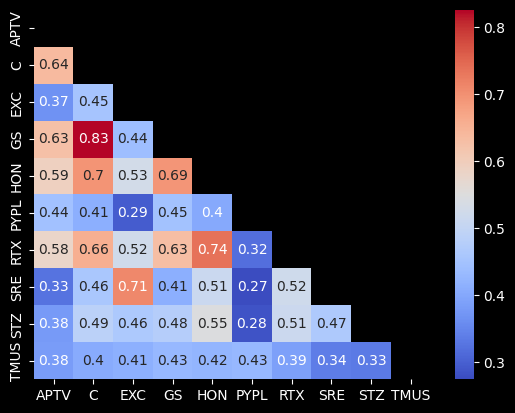

In [ ]:
#Cluster 0 Correlation Matrix
cluster = clustering_result.loc[0]['Company'].tolist()
price_data_0 = yf.download(cluster, start='2018-01-01', end="2023-07-03")['Adj Close']
original_price_data_0 = price_data_0.copy()
#Weekly % change
price_data_0 = price_data_0.pct_change().dropna()

matrix = price_data_0.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(matrix, dtype=bool))
masked_array = np.ma.masked_array(matrix, mask)

sns.heatmap(matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_0.columns):
  correlation = correlation + price_data_0[ticker].corr(spy_returns)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_corr_0 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_corr_0))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

Average Internal Correlation: 0.8229944749014245
Cluster Correlation to SPY: 0.8589037776944594


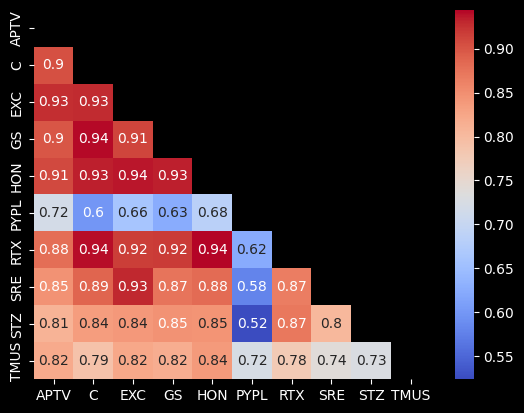

In [ ]:
#Cluster 0 Volatility (StdDev) Correlation Matrix
log_return = (original_price_data_0 / original_price_data_0.shift(1)).apply(np.log).dropna()
result_stdev_0 = log_return.rolling(window=30, center=False).std() * math.sqrt(252)
result_stdev_0 = result_stdev_0.dropna()
stdev_matrix = result_stdev_0.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(stdev_matrix, dtype=bool))
masked_array = np.ma.masked_array(stdev_matrix, mask)

sns.heatmap(stdev_matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_0.columns):
  correlation = correlation + result_stdev_0[ticker].corr(SPY_stdev)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_stdev_corr_0 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_stdev_corr_0))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

[*********************100%***********************]  4 of 4 completed
Average Internal Correlation: 0.4320647419865451
Cluster Correlation to SPY: 0.6714315321828823


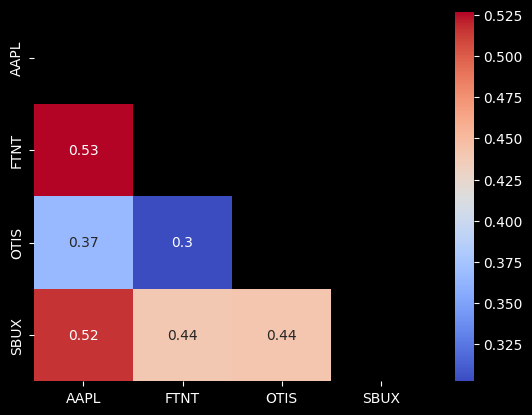

In [ ]:
#Cluster 1 Correlation Matrix
cluster = clustering_result.loc[1]['Company'].tolist()
price_data_1 = yf.download(cluster, start='2018-01-01', end="2023-07-03")['Adj Close']
original_price_data_1 = price_data_1.copy()
#Weekly % change
price_data_1 = price_data_1.pct_change().dropna()

matrix = price_data_1.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(matrix, dtype=bool))
masked_array = np.ma.masked_array(matrix, mask)

sns.heatmap(matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_1.columns):
  correlation = correlation + price_data_1[ticker].corr(spy_returns)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_corr_1 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_corr_1))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

Average Internal Correlation: 0.5473746576401655
Cluster Correlation to SPY: 0.7144760772838076


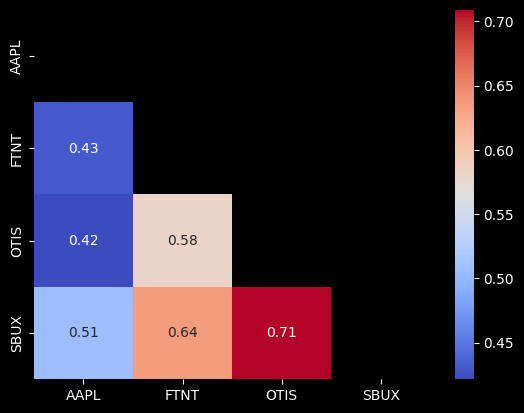

In [ ]:
#Cluster 1 Volatility (StdDev) Correlation Matrix
log_return = (original_price_data_1 / original_price_data_1.shift(1)).apply(np.log).dropna()
result_stdev_1 = log_return.rolling(window=30, center=False).std() * math.sqrt(252)
result_stdev_1 = result_stdev_1.dropna()
stdev_matrix = result_stdev_1.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(stdev_matrix, dtype=bool))
masked_array = np.ma.masked_array(stdev_matrix, mask)

sns.heatmap(stdev_matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_1.columns):
  correlation = correlation + result_stdev_1[ticker].corr(SPY_stdev)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_stdev_corr_1 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_stdev_corr_1))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

[*********************100%***********************]  6 of 6 completed
Average Internal Correlation: 0.4579914981567654
Cluster Correlation to SPY: 0.6703421782630311


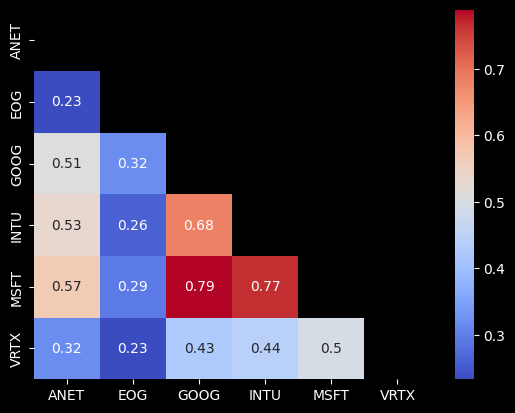

In [ ]:
#Cluster 2 Correlation Matrix
cluster = clustering_result.loc[2]['Company'].tolist()
price_data_2 = yf.download(cluster, start='2018-01-01', end="2023-07-03")['Adj Close']
original_price_data_2 = price_data_2.copy()
#Weekly % change
price_data_2 = price_data_2.pct_change().dropna()

matrix = price_data_2.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(matrix, dtype=bool))
masked_array = np.ma.masked_array(matrix, mask)

sns.heatmap(matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_2.columns):
  correlation = correlation + price_data_2[ticker].corr(spy_returns)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_corr_2 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_corr_2))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

Average Internal Correlation: 0.6406168148916336
Cluster Correlation to SPY: 0.7928852677344863


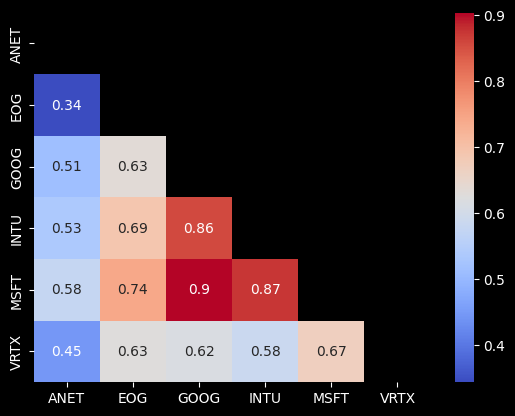

In [ ]:
#Cluster 2 Volatility (StdDev) Correlation Matrix
log_return = (original_price_data_2 / original_price_data_2.shift(1)).apply(np.log).dropna()
result_stdev_2 = log_return.rolling(window=30, center=False).std() * math.sqrt(252)
result_stdev_2 = result_stdev_2.dropna()
stdev_matrix = result_stdev_2.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(stdev_matrix, dtype=bool))
masked_array = np.ma.masked_array(stdev_matrix, mask)

sns.heatmap(stdev_matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_2.columns):
  correlation = correlation + result_stdev_2[ticker].corr(SPY_stdev)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_stdev_corr_2 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_stdev_corr_2))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

[*********************100%***********************]  6 of 6 completed
Average Internal Correlation: 0.3527465615529559
Cluster Correlation to SPY: 0.6150436763656725


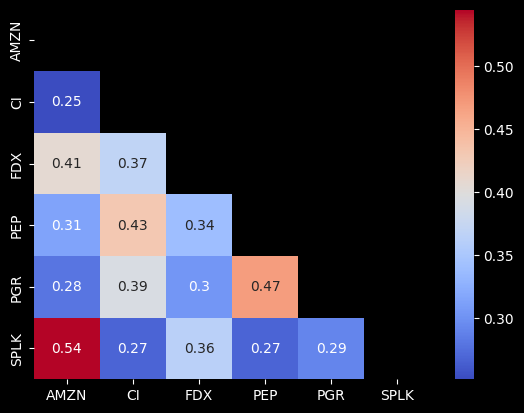

In [ ]:
#Cluster 3 Correlation Matrix
cluster = clustering_result.loc[3]['Company'].tolist()
price_data_3 = yf.download(cluster, start='2018-01-01', end="2023-07-03")['Adj Close']
original_price_data_3 = price_data_3.copy()
#Weekly % change
price_data_3 = price_data_3.pct_change().dropna()

matrix = price_data_3.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(matrix, dtype=bool))
masked_array = np.ma.masked_array(matrix, mask)

sns.heatmap(matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_3.columns):
  correlation = correlation + price_data_3[ticker].corr(spy_returns)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_corr_3 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_corr_3))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

Average Internal Correlation: 0.6129301186815437
Cluster Correlation to SPY: 0.791940763053208


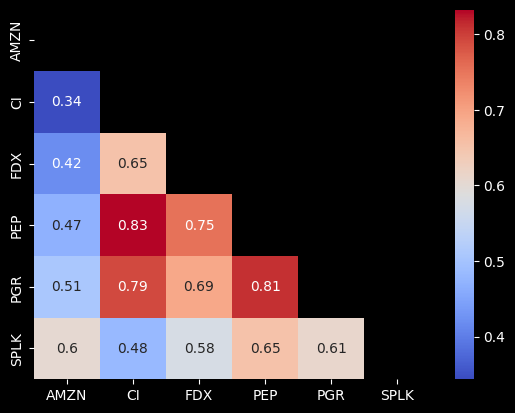

In [ ]:
#Cluster 3 Volatility (StdDev) Correlation Matrix
log_return = (original_price_data_3 / original_price_data_3.shift(1)).apply(np.log).dropna()
result_stdev_3 = log_return.rolling(window=30, center=False).std() * math.sqrt(252)
result_stdev_3 = result_stdev_3.dropna()
stdev_matrix = result_stdev_3.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(stdev_matrix, dtype=bool))
masked_array = np.ma.masked_array(stdev_matrix, mask)

sns.heatmap(stdev_matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_3.columns):
  correlation = correlation + result_stdev_3[ticker].corr(SPY_stdev)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_stdev_corr_3 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_stdev_corr_3))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

[*********************100%***********************]  3 of 3 completed
Average Internal Correlation: 0.5359392398088662
Cluster Correlation to SPY: 0.6516506202020981


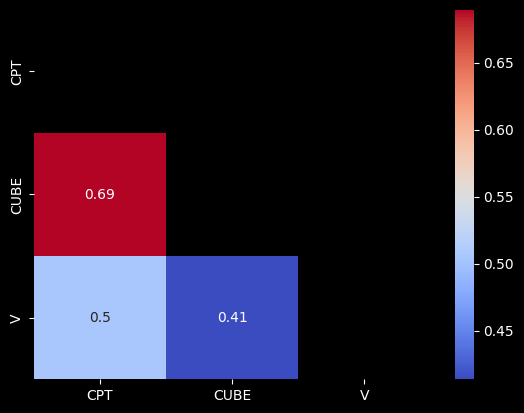

In [ ]:
#Cluster 4 Correlation Matrix
cluster = clustering_result.loc[4]['Company'].tolist()
price_data_4 = yf.download(cluster, start='2018-01-01', end="2023-07-03")['Adj Close']
original_price_data_4 = price_data_4.copy()
#Weekly % change
price_data_4 = price_data_4.pct_change().dropna()

matrix = price_data_4.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(matrix, dtype=bool))
masked_array = np.ma.masked_array(matrix, mask)

sns.heatmap(matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_4.columns):
  correlation = correlation + price_data_4[ticker].corr(spy_returns)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_corr_4 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_corr_4))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

Average Internal Correlation: 0.8810739731292893
Cluster Correlation to SPY: 0.9057271794902476


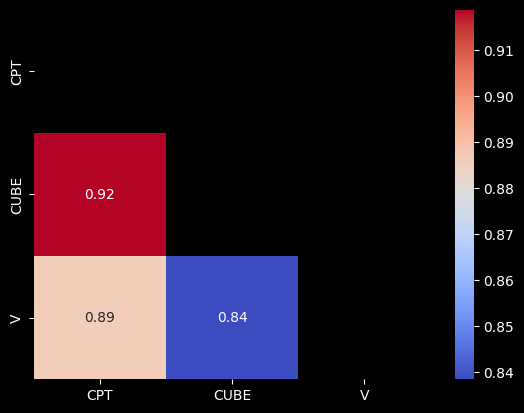

In [ ]:
#Cluster 4 Volatility (StdDev) Correlation Matrix
log_return = (original_price_data_4 / original_price_data_4.shift(1)).apply(np.log).dropna()
result_stdev_4 = log_return.rolling(window=30, center=False).std() * math.sqrt(252)
result_stdev_4 = result_stdev_4.dropna()
stdev_matrix = result_stdev_4.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(stdev_matrix, dtype=bool))
masked_array = np.ma.masked_array(stdev_matrix, mask)

sns.heatmap(stdev_matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_4.columns):
  correlation = correlation + result_stdev_4[ticker].corr(SPY_stdev)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_stdev_corr_4 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_stdev_corr_4))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

[*********************100%***********************]  15 of 15 completed
Average Internal Correlation: 0.38070198718084836
Cluster Correlation to SPY: 0.606639741238179


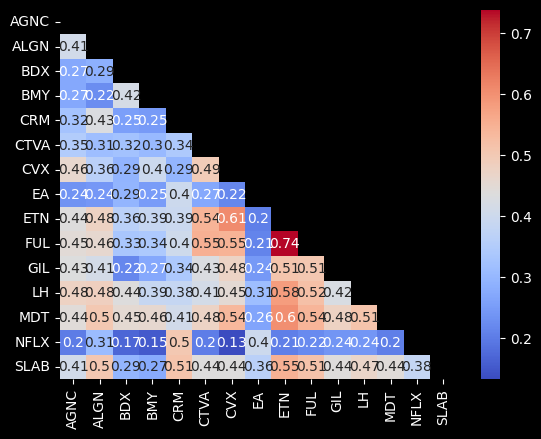

In [ ]:
#Cluster 5 Correlation Matrix
cluster = clustering_result.loc[5]['Company'].tolist()
price_data_5 = yf.download(cluster, start='2018-01-01', end="2023-07-03")['Adj Close']
original_price_data_5 = price_data_5.copy()
#Weekly % change
price_data_5 = price_data_5.pct_change().dropna()

matrix = price_data_5.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(matrix, dtype=bool))
masked_array = np.ma.masked_array(matrix, mask)

sns.heatmap(matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_5.columns):
  correlation = correlation + price_data_5[ticker].corr(spy_returns)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_corr_5 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_corr_5))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

Average Internal Correlation: 0.7033992652592601
Cluster Correlation to SPY: 0.8183823834480759


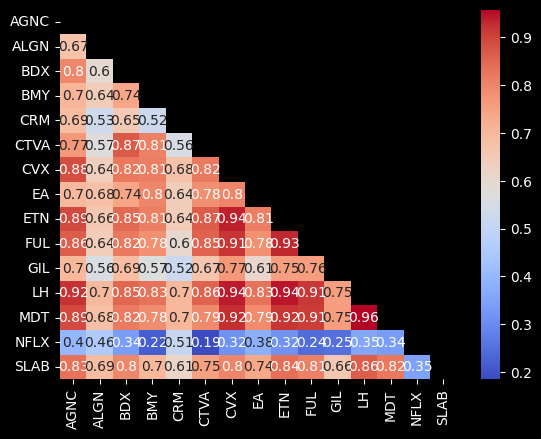

In [ ]:
#Cluster 5 Volatility (StdDev) Correlation Matrix
log_return = (original_price_data_5 / original_price_data_5.shift(1)).apply(np.log).dropna()
result_stdev_5 = log_return.rolling(window=30, center=False).std() * math.sqrt(252)
result_stdev_5 = result_stdev_5.dropna()
stdev_matrix = result_stdev_5.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(stdev_matrix, dtype=bool))
masked_array = np.ma.masked_array(stdev_matrix, mask)

sns.heatmap(stdev_matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_5.columns):
  correlation = correlation + result_stdev_5[ticker].corr(SPY_stdev)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_stdev_corr_5 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_stdev_corr_5))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

[*********************100%***********************]  3 of 3 completed
Average Internal Correlation: 0.25014269683530954
Cluster Correlation to SPY: 0.47426274525984785


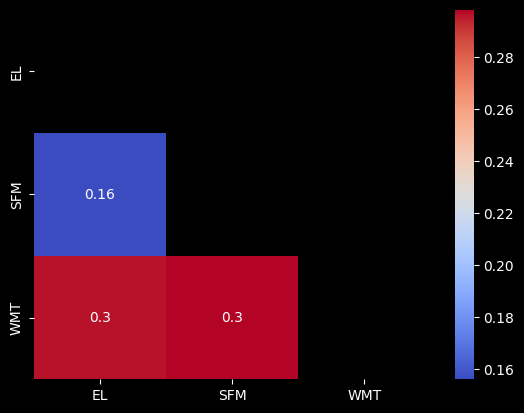

In [ ]:
#Cluster 6 Correlation Matrix
cluster = clustering_result.loc[6]['Company'].tolist()
price_data_6 = yf.download(cluster, start='2018-01-01', end="2023-07-03")['Adj Close']
original_price_data_6 = price_data_6.copy()
#Weekly % change
price_data_6 = price_data_6.pct_change().dropna()

matrix = price_data_6.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(matrix, dtype=bool))
masked_array = np.ma.masked_array(matrix, mask)

sns.heatmap(matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_6.columns):
  correlation = correlation + price_data_6[ticker].corr(spy_returns)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_corr_6 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_corr_6))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

Average Internal Correlation: 0.6691129808096582
Cluster Correlation to SPY: 0.778906785605571


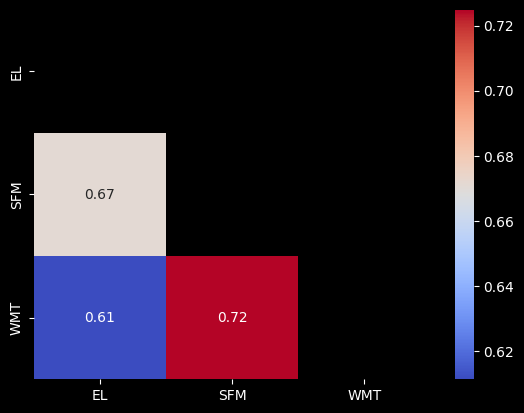

In [ ]:
#Cluster 6 Volatility (StdDev) Correlation Matrix
log_return = (original_price_data_6 / original_price_data_6.shift(1)).apply(np.log).dropna()
result_stdev_6 = log_return.rolling(window=30, center=False).std() * math.sqrt(252)
result_stdev_6 = result_stdev_6.dropna()
stdev_matrix = result_stdev_6.corr()

#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(stdev_matrix, dtype=bool))
masked_array = np.ma.masked_array(stdev_matrix, mask)

sns.heatmap(stdev_matrix, annot=True, cmap='coolwarm', mask=mask)

#Find avg correlation of each stock to SPY
correlation = 0
for i, ticker in enumerate(price_data_6.columns):
  correlation = correlation + result_stdev_6[ticker].corr(SPY_stdev)

avg_corr_to_SPY = correlation / (i+1)

#Average Correlation Value
avg_stdev_corr_6 = masked_array.mean().mean()
print('Average Internal Correlation: ' + str(avg_stdev_corr_6))
print('Cluster Correlation to SPY: '+ str(avg_corr_to_SPY))

In [ ]:
print('Average Internal Price Correlation Cluster 0: ' + str(avg_corr_0))
print('Average Internal Price Correlation Cluster 1: ' + str(avg_corr_1))
print('Average Internal Price Correlation Cluster 2: ' + str(avg_corr_2))
print('Average Internal Price Correlation Cluster 3: ' + str(avg_corr_3))
print('Average Internal Price Correlation Cluster 4: ' + str(avg_corr_4))
print('Average Internal Price Correlation Cluster 5: ' + str(avg_corr_5))
print('Average Internal Price Correlation Cluster 6: ' + str(avg_corr_6))
print()
print('Average Internal Std Dev Volatility Correlation Cluster 0: ' + str(avg_stdev_corr_0))
print('Average Internal Std Dev Volatility Correlation Cluster 1: ' + str(avg_stdev_corr_1))
print('Average Internal Std Dev Volatility Correlation Cluster 2: ' + str(avg_stdev_corr_2))
print('Average Internal Std Dev Volatility Correlation Cluster 3: ' + str(avg_stdev_corr_3))
print('Average Internal Std Dev Volatility Correlation Cluster 4: ' + str(avg_stdev_corr_4))
print('Average Internal Std Dev Volatility Correlation Cluster 5: ' + str(avg_stdev_corr_5))
print('Average Internal Std Dev Volatility Correlation Cluster 6: ' + str(avg_stdev_corr_6))

Average Internal Price Correlation Cluster 0: 0.43899742813331316
Average Internal Price Correlation Cluster 1: 0.547468436801773
Average Internal Price Correlation Cluster 2: 0.5286279584119935
Average Internal Price Correlation Cluster 3: 0.37306332375247164
Average Internal Price Correlation Cluster 4: 0.42709476231952265
Average Internal Price Correlation Cluster 5: 0.43025516910476985
Average Internal Price Correlation Cluster 6: 0.20672526449690043

Average Internal Std Dev Volatility Correlation Cluster 0: 0.7939242365071127
Average Internal Std Dev Volatility Correlation Cluster 1: 0.7619987341090805
Average Internal Std Dev Volatility Correlation Cluster 2: 0.8196682967837258
Average Internal Std Dev Volatility Correlation Cluster 3: 0.6218352345823929
Average Internal Std Dev Volatility Correlation Cluster 4: 0.7633302508281599
Average Internal Std Dev Volatility Correlation Cluster 5: 0.7435071734995011
Average Internal Std Dev Volatility Correlation Cluster 6: 0.82689001634

In [ ]:
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6',]
corr_matrix = pd.DataFrame(columns=clusters, index=clusters)

In [ ]:
# Cluster 0 External Correlation
correlation_results_01 = pd.DataFrame(columns=result_stdev_1.columns, index=result_stdev_0.columns)
correlation_results_02 = pd.DataFrame(columns=result_stdev_2.columns, index=result_stdev_0.columns)
correlation_results_03 = pd.DataFrame(columns=result_stdev_3.columns, index=result_stdev_0.columns)
correlation_results_04 = pd.DataFrame(columns=result_stdev_4.columns, index=result_stdev_0.columns)
correlation_results_05 = pd.DataFrame(columns=result_stdev_5.columns, index=result_stdev_0.columns)
correlation_results_06 = pd.DataFrame(columns=result_stdev_6.columns, index=result_stdev_0.columns)

for col1 in result_stdev_0.columns:
    for col2 in result_stdev_1.columns:
        correlation = result_stdev_0[col1].corr(result_stdev_1[col2])
        correlation_results_01.loc[col1, col2] = correlation

    for col2 in result_stdev_2.columns:
        correlation = result_stdev_0[col1].corr(result_stdev_2[col2])
        correlation_results_02.loc[col1, col2] = correlation

    for col2 in result_stdev_3.columns:
        correlation = result_stdev_0[col1].corr(result_stdev_3[col2])
        correlation_results_03.loc[col1, col2] = correlation

    for col2 in result_stdev_4.columns:
        correlation = result_stdev_0[col1].corr(result_stdev_4[col2])
        correlation_results_04.loc[col1, col2] = correlation

    for col2 in result_stdev_5.columns:
        correlation = result_stdev_0[col1].corr(result_stdev_5[col2])
        correlation_results_05.loc[col1, col2] = correlation

    for col2 in result_stdev_6.columns:
        correlation = result_stdev_0[col1].corr(result_stdev_6[col2])
        correlation_results_06.loc[col1, col2] = correlation



ext_corr_01 = correlation_results_01.mean().mean()
ext_corr_02 = correlation_results_02.mean().mean()
ext_corr_03 = correlation_results_03.mean().mean()
ext_corr_04 = correlation_results_04.mean().mean()
ext_corr_05 = correlation_results_05.mean().mean()
ext_corr_06 = correlation_results_06.mean().mean()

corr_matrix.loc['Cluster 1', 'Cluster 0'] = ext_corr_01
corr_matrix.loc['Cluster 2', 'Cluster 0'] = ext_corr_02
corr_matrix.loc['Cluster 3', 'Cluster 0'] = ext_corr_03
corr_matrix.loc['Cluster 4', 'Cluster 0'] = ext_corr_04
corr_matrix.loc['Cluster 5', 'Cluster 0'] = ext_corr_05
corr_matrix.loc['Cluster 6', 'Cluster 0'] = ext_corr_06

In [ ]:
# Cluster 1 External Correlation
correlation_results_10 = pd.DataFrame(columns=result_stdev_0.columns, index=result_stdev_1.columns)
correlation_results_12 = pd.DataFrame(columns=result_stdev_2.columns, index=result_stdev_1.columns)
correlation_results_13 = pd.DataFrame(columns=result_stdev_3.columns, index=result_stdev_1.columns)
correlation_results_14 = pd.DataFrame(columns=result_stdev_4.columns, index=result_stdev_1.columns)
correlation_results_15 = pd.DataFrame(columns=result_stdev_5.columns, index=result_stdev_1.columns)
correlation_results_16 = pd.DataFrame(columns=result_stdev_6.columns, index=result_stdev_1.columns)

for col1 in result_stdev_1.columns:
    for col2 in result_stdev_0.columns:
        correlation = result_stdev_1[col1].corr(result_stdev_0[col2])
        correlation_results_10.loc[col1, col2] = correlation

    for col2 in result_stdev_2.columns:
        correlation = result_stdev_1[col1].corr(result_stdev_2[col2])
        correlation_results_12.loc[col1, col2] = correlation

    for col2 in result_stdev_3.columns:
        correlation = result_stdev_1[col1].corr(result_stdev_3[col2])
        correlation_results_13.loc[col1, col2] = correlation

    for col2 in result_stdev_4.columns:
        correlation = result_stdev_1[col1].corr(result_stdev_4[col2])
        correlation_results_14.loc[col1, col2] = correlation

    for col2 in result_stdev_5.columns:
        correlation = result_stdev_1[col1].corr(result_stdev_5[col2])
        correlation_results_15.loc[col1, col2] = correlation

    for col2 in result_stdev_6.columns:
        correlation = result_stdev_1[col1].corr(result_stdev_6[col2])
        correlation_results_16.loc[col1, col2] = correlation


ext_corr_10 = correlation_results_10.mean().mean()
ext_corr_12 = correlation_results_12.mean().mean()
ext_corr_13 = correlation_results_13.mean().mean()
ext_corr_14 = correlation_results_14.mean().mean()
ext_corr_15 = correlation_results_15.mean().mean()
ext_corr_16 = correlation_results_16.mean().mean()

corr_matrix.loc['Cluster 0', 'Cluster 1'] = ext_corr_10
corr_matrix.loc['Cluster 2', 'Cluster 1'] = ext_corr_12
corr_matrix.loc['Cluster 3', 'Cluster 1'] = ext_corr_13
corr_matrix.loc['Cluster 4', 'Cluster 1'] = ext_corr_14
corr_matrix.loc['Cluster 5', 'Cluster 1'] = ext_corr_15
corr_matrix.loc['Cluster 6', 'Cluster 1'] = ext_corr_16

In [ ]:
# Cluster 2 External Correlation
correlation_results_20 = pd.DataFrame(columns=result_stdev_0.columns, index=result_stdev_2.columns)
correlation_results_21 = pd.DataFrame(columns=result_stdev_1.columns, index=result_stdev_2.columns)
correlation_results_23 = pd.DataFrame(columns=result_stdev_3.columns, index=result_stdev_2.columns)
correlation_results_24 = pd.DataFrame(columns=result_stdev_4.columns, index=result_stdev_2.columns)
correlation_results_25 = pd.DataFrame(columns=result_stdev_5.columns, index=result_stdev_2.columns)
correlation_results_26 = pd.DataFrame(columns=result_stdev_6.columns, index=result_stdev_2.columns)

for col1 in result_stdev_2.columns:
    for col2 in result_stdev_0.columns:
        correlation = result_stdev_2[col1].corr(result_stdev_0[col2])
        correlation_results_20.loc[col1, col2] = correlation

    for col2 in result_stdev_1.columns:
        correlation = result_stdev_2[col1].corr(result_stdev_1[col2])
        correlation_results_21.loc[col1, col2] = correlation

    for col2 in result_stdev_3.columns:
        correlation = result_stdev_2[col1].corr(result_stdev_3[col2])
        correlation_results_23.loc[col1, col2] = correlation

    for col2 in result_stdev_4.columns:
        correlation = result_stdev_2[col1].corr(result_stdev_4[col2])
        correlation_results_24.loc[col1, col2] = correlation

    for col2 in result_stdev_5.columns:
        correlation = result_stdev_2[col1].corr(result_stdev_5[col2])
        correlation_results_25.loc[col1, col2] = correlation

    for col2 in result_stdev_6.columns:
        correlation = result_stdev_2[col1].corr(result_stdev_6[col2])
        correlation_results_26.loc[col1, col2] = correlation

ext_corr_20 = correlation_results_20.mean().mean()
ext_corr_21 = correlation_results_21.mean().mean()
ext_corr_23 = correlation_results_23.mean().mean()
ext_corr_24 = correlation_results_24.mean().mean()
ext_corr_25 = correlation_results_25.mean().mean()
ext_corr_26 = correlation_results_26.mean().mean()

corr_matrix.loc['Cluster 0', 'Cluster 2'] = ext_corr_20
corr_matrix.loc['Cluster 1', 'Cluster 2'] = ext_corr_21
corr_matrix.loc['Cluster 3', 'Cluster 2'] = ext_corr_23
corr_matrix.loc['Cluster 4', 'Cluster 2'] = ext_corr_24
corr_matrix.loc['Cluster 5', 'Cluster 2'] = ext_corr_25
corr_matrix.loc['Cluster 6', 'Cluster 2'] = ext_corr_26

In [ ]:
# Cluster 3 External Correlation
correlation_results_30 = pd.DataFrame(columns=result_stdev_0.columns, index=result_stdev_3.columns)
correlation_results_31 = pd.DataFrame(columns=result_stdev_1.columns, index=result_stdev_3.columns)
correlation_results_32 = pd.DataFrame(columns=result_stdev_2.columns, index=result_stdev_3.columns)
correlation_results_34 = pd.DataFrame(columns=result_stdev_4.columns, index=result_stdev_3.columns)
correlation_results_35 = pd.DataFrame(columns=result_stdev_5.columns, index=result_stdev_3.columns)
correlation_results_36 = pd.DataFrame(columns=result_stdev_6.columns, index=result_stdev_3.columns)

for col1 in result_stdev_3.columns:
    for col2 in result_stdev_0.columns:
        correlation = result_stdev_3[col1].corr(result_stdev_0[col2])
        correlation_results_30.loc[col1, col2] = correlation

    for col2 in result_stdev_1.columns:
        correlation = result_stdev_3[col1].corr(result_stdev_1[col2])
        correlation_results_31.loc[col1, col2] = correlation

    for col2 in result_stdev_2.columns:
        correlation = result_stdev_3[col1].corr(result_stdev_2[col2])
        correlation_results_32.loc[col1, col2] = correlation

    for col2 in result_stdev_4.columns:
        correlation = result_stdev_3[col1].corr(result_stdev_4[col2])
        correlation_results_34.loc[col1, col2] = correlation

    for col2 in result_stdev_5.columns:
        correlation = result_stdev_3[col1].corr(result_stdev_5[col2])
        correlation_results_35.loc[col1, col2] = correlation

    for col2 in result_stdev_6.columns:
        correlation = result_stdev_3[col1].corr(result_stdev_6[col2])
        correlation_results_36.loc[col1, col2] = correlation

ext_corr_30 = correlation_results_30.mean().mean()
ext_corr_31 = correlation_results_31.mean().mean()
ext_corr_32 = correlation_results_32.mean().mean()
ext_corr_34 = correlation_results_34.mean().mean()
ext_corr_35 = correlation_results_35.mean().mean()
ext_corr_36 = correlation_results_36.mean().mean()

corr_matrix.loc['Cluster 0', 'Cluster 3'] = ext_corr_30
corr_matrix.loc['Cluster 1', 'Cluster 3'] = ext_corr_31
corr_matrix.loc['Cluster 2', 'Cluster 3'] = ext_corr_32
corr_matrix.loc['Cluster 4', 'Cluster 3'] = ext_corr_34
corr_matrix.loc['Cluster 5', 'Cluster 3'] = ext_corr_35
corr_matrix.loc['Cluster 6', 'Cluster 3'] = ext_corr_36

In [ ]:
# Cluster 4 External Correlation
correlation_results_40 = pd.DataFrame(columns=result_stdev_0.columns, index=result_stdev_4.columns)
correlation_results_41 = pd.DataFrame(columns=result_stdev_1.columns, index=result_stdev_4.columns)
correlation_results_42 = pd.DataFrame(columns=result_stdev_2.columns, index=result_stdev_4.columns)
correlation_results_43 = pd.DataFrame(columns=result_stdev_3.columns, index=result_stdev_4.columns)
correlation_results_45 = pd.DataFrame(columns=result_stdev_5.columns, index=result_stdev_4.columns)
correlation_results_46 = pd.DataFrame(columns=result_stdev_6.columns, index=result_stdev_4.columns)

for col1 in result_stdev_4.columns:
    for col2 in result_stdev_0.columns:
        correlation = result_stdev_4[col1].corr(result_stdev_0[col2])
        correlation_results_40.loc[col1, col2] = correlation

    for col2 in result_stdev_1.columns:
        correlation = result_stdev_4[col1].corr(result_stdev_1[col2])
        correlation_results_41.loc[col1, col2] = correlation

    for col2 in result_stdev_2.columns:
        correlation = result_stdev_4[col1].corr(result_stdev_2[col2])
        correlation_results_42.loc[col1, col2] = correlation

    for col2 in result_stdev_3.columns:
        correlation = result_stdev_4[col1].corr(result_stdev_3[col2])
        correlation_results_43.loc[col1, col2] = correlation

    for col2 in result_stdev_5.columns:
        correlation = result_stdev_4[col1].corr(result_stdev_5[col2])
        correlation_results_45.loc[col1, col2] = correlation

    for col2 in result_stdev_6.columns:
        correlation = result_stdev_4[col1].corr(result_stdev_6[col2])
        correlation_results_46.loc[col1, col2] = correlation

ext_corr_40 = correlation_results_40.mean().mean()
ext_corr_41 = correlation_results_41.mean().mean()
ext_corr_42 = correlation_results_42.mean().mean()
ext_corr_43 = correlation_results_43.mean().mean()
ext_corr_45 = correlation_results_45.mean().mean()
ext_corr_46 = correlation_results_46.mean().mean()

corr_matrix.loc['Cluster 0', 'Cluster 4'] = ext_corr_40
corr_matrix.loc['Cluster 1', 'Cluster 4'] = ext_corr_41
corr_matrix.loc['Cluster 2', 'Cluster 4'] = ext_corr_42
corr_matrix.loc['Cluster 3', 'Cluster 4'] = ext_corr_43
corr_matrix.loc['Cluster 5', 'Cluster 4'] = ext_corr_45
corr_matrix.loc['Cluster 6', 'Cluster 4'] = ext_corr_46

In [ ]:
# Cluster 5 External Correlation
correlation_results_50 = pd.DataFrame(columns=result_stdev_0.columns, index=result_stdev_5.columns)
correlation_results_51 = pd.DataFrame(columns=result_stdev_1.columns, index=result_stdev_5.columns)
correlation_results_52 = pd.DataFrame(columns=result_stdev_2.columns, index=result_stdev_5.columns)
correlation_results_53 = pd.DataFrame(columns=result_stdev_3.columns, index=result_stdev_5.columns)
correlation_results_54 = pd.DataFrame(columns=result_stdev_4.columns, index=result_stdev_5.columns)
correlation_results_56 = pd.DataFrame(columns=result_stdev_6.columns, index=result_stdev_5.columns)

for col1 in result_stdev_5.columns:
    for col2 in result_stdev_0.columns:
        correlation = result_stdev_5[col1].corr(result_stdev_0[col2])
        correlation_results_50.loc[col1, col2] = correlation

    for col2 in result_stdev_1.columns:
        correlation = result_stdev_5[col1].corr(result_stdev_1[col2])
        correlation_results_51.loc[col1, col2] = correlation

    for col2 in result_stdev_2.columns:
        correlation = result_stdev_5[col1].corr(result_stdev_2[col2])
        correlation_results_52.loc[col1, col2] = correlation

    for col2 in result_stdev_3.columns:
        correlation = result_stdev_5[col1].corr(result_stdev_3[col2])
        correlation_results_53.loc[col1, col2] = correlation

    for col2 in result_stdev_4.columns:
        correlation = result_stdev_5[col1].corr(result_stdev_4[col2])
        correlation_results_54.loc[col1, col2] = correlation

    for col2 in result_stdev_6.columns:
        correlation = result_stdev_5[col1].corr(result_stdev_6[col2])
        correlation_results_56.loc[col1, col2] = correlation

ext_corr_50 = correlation_results_50.mean().mean()
ext_corr_51 = correlation_results_51.mean().mean()
ext_corr_52 = correlation_results_52.mean().mean()
ext_corr_53 = correlation_results_53.mean().mean()
ext_corr_54 = correlation_results_54.mean().mean()
ext_corr_56 = correlation_results_56.mean().mean()

corr_matrix.loc['Cluster 0', 'Cluster 5'] = ext_corr_50
corr_matrix.loc['Cluster 1', 'Cluster 5'] = ext_corr_51
corr_matrix.loc['Cluster 2', 'Cluster 5'] = ext_corr_52
corr_matrix.loc['Cluster 3', 'Cluster 5'] = ext_corr_53
corr_matrix.loc['Cluster 4', 'Cluster 5'] = ext_corr_54
corr_matrix.loc['Cluster 6', 'Cluster 5'] = ext_corr_56

In [ ]:
# Cluster 6 External Correlation
correlation_results_60 = pd.DataFrame(columns=result_stdev_0.columns, index=result_stdev_6.columns)
correlation_results_61 = pd.DataFrame(columns=result_stdev_1.columns, index=result_stdev_6.columns)
correlation_results_62 = pd.DataFrame(columns=result_stdev_2.columns, index=result_stdev_6.columns)
correlation_results_63 = pd.DataFrame(columns=result_stdev_3.columns, index=result_stdev_6.columns)
correlation_results_64 = pd.DataFrame(columns=result_stdev_4.columns, index=result_stdev_6.columns)
correlation_results_65 = pd.DataFrame(columns=result_stdev_5.columns, index=result_stdev_6.columns)

for col1 in result_stdev_6.columns:
    for col2 in result_stdev_0.columns:
        correlation = result_stdev_6[col1].corr(result_stdev_0[col2])
        correlation_results_60.loc[col1, col2] = correlation

    for col2 in result_stdev_1.columns:
        correlation = result_stdev_6[col1].corr(result_stdev_1[col2])
        correlation_results_61.loc[col1, col2] = correlation

    for col2 in result_stdev_2.columns:
        correlation = result_stdev_6[col1].corr(result_stdev_2[col2])
        correlation_results_62.loc[col1, col2] = correlation

    for col2 in result_stdev_3.columns:
        correlation = result_stdev_6[col1].corr(result_stdev_3[col2])
        correlation_results_63.loc[col1, col2] = correlation

    for col2 in result_stdev_4.columns:
        correlation = result_stdev_6[col1].corr(result_stdev_4[col2])
        correlation_results_64.loc[col1, col2] = correlation

    for col2 in result_stdev_5.columns:
        correlation = result_stdev_6[col1].corr(result_stdev_5[col2])
        correlation_results_65.loc[col1, col2] = correlation

ext_corr_60 = correlation_results_60.mean().mean()
ext_corr_61 = correlation_results_61.mean().mean()
ext_corr_62 = correlation_results_62.mean().mean()
ext_corr_63 = correlation_results_63.mean().mean()
ext_corr_64 = correlation_results_64.mean().mean()
ext_corr_65 = correlation_results_65.mean().mean()

corr_matrix.loc['Cluster 0', 'Cluster 6'] = ext_corr_60
corr_matrix.loc['Cluster 1', 'Cluster 6'] = ext_corr_61
corr_matrix.loc['Cluster 2', 'Cluster 6'] = ext_corr_62
corr_matrix.loc['Cluster 3', 'Cluster 6'] = ext_corr_63
corr_matrix.loc['Cluster 4', 'Cluster 6'] = ext_corr_64
corr_matrix.loc['Cluster 5', 'Cluster 6'] = ext_corr_65

In [ ]:
print('Average Internal Std Dev Volatility Correlation Cluster 0: ' + str(avg_stdev_corr_0))
print('Average Internal Std Dev Volatility Correlation Cluster 1: ' + str(avg_stdev_corr_1))
print('Average Internal Std Dev Volatility Correlation Cluster 2: ' + str(avg_stdev_corr_2))
print('Average Internal Std Dev Volatility Correlation Cluster 3: ' + str(avg_stdev_corr_3))
print('Average Internal Std Dev Volatility Correlation Cluster 4: ' + str(avg_stdev_corr_4))
print('Average Internal Std Dev Volatility Correlation Cluster 5: ' + str(avg_stdev_corr_5))
print('Average Internal Std Dev Volatility Correlation Cluster 6: ' + str(avg_stdev_corr_6))

Average Internal Std Dev Volatility Correlation Cluster 0: 0.7939242365071127
Average Internal Std Dev Volatility Correlation Cluster 1: 0.7619987341090805
Average Internal Std Dev Volatility Correlation Cluster 2: 0.8196682967837258
Average Internal Std Dev Volatility Correlation Cluster 3: 0.6218352345823929
Average Internal Std Dev Volatility Correlation Cluster 4: 0.7633302508281599
Average Internal Std Dev Volatility Correlation Cluster 5: 0.7435071734995011
Average Internal Std Dev Volatility Correlation Cluster 6: 0.8268900163425246


In [ ]:
corr_matrix.loc['Cluster 0', 'Cluster 0'] = avg_stdev_corr_0
corr_matrix.loc['Cluster 1', 'Cluster 1'] = avg_stdev_corr_1
corr_matrix.loc['Cluster 2', 'Cluster 2'] = avg_stdev_corr_2
corr_matrix.loc['Cluster 3', 'Cluster 3'] = avg_stdev_corr_3
corr_matrix.loc['Cluster 4', 'Cluster 4'] = avg_stdev_corr_4
corr_matrix.loc['Cluster 5', 'Cluster 5'] = avg_stdev_corr_5
corr_matrix.loc['Cluster 6', 'Cluster 6'] = avg_stdev_corr_6

In [ ]:
corr_matrix = corr_matrix.astype('float64')

<Axes: >

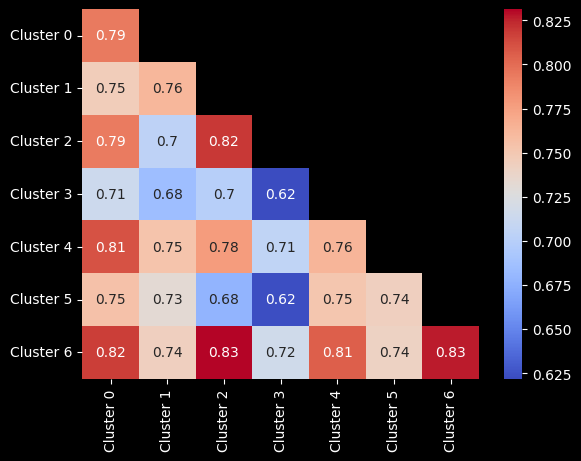

In [ ]:
#Only show and use unmasked values in average calculation
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask[np.diag_indices_from(mask)] = False

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)